# Predict

In [1]:
import pandas as pd
from katlas.train import *
from katlas.dnn import *
from fastai.vision.all import *
from katlas.pssm import *

In [2]:
pspa_unk = pd.read_parquet('out/kd_similar_pspa.parquet')
pspa_unk = pspa_unk[pspa_unk.within_threshold].copy()

In [21]:
pspa_t5 = pd.read_parquet('train/pspa_t5.parquet')

In [22]:
pspa_t5

,-5P,-4P,-3P,-2P,-1P,0P,1P,2P,3P,4P,...,T5_1014,T5_1015,T5_1016,T5_1017,T5_1018,T5_1019,T5_1020,T5_1021,T5_1022,T5_1023
index,,,,,,,,,,,,,,,,,,,,,
Q2M2I8_AAK1_HUMAN_KD1,0.05845,0.04172,0.08610,0.01794,0.09607,0.0,0.04265,0.04048,0.05264,0.05026,...,-0.041534,-0.037750,-0.036285,-0.011772,0.080261,-0.028107,-0.039490,-0.015945,-0.028931,-0.019714
P27037_AVR2A_HUMAN_KD1,0.02971,0.03341,0.03345,0.01462,0.02657,0.0,0.01055,0.04285,0.04958,0.05559,...,-0.035553,-0.033875,-0.037323,-0.012810,0.041565,-0.022293,-0.031616,-0.010536,-0.040009,-0.015930
Q13705_AVR2B_HUMAN_KD1,0.03779,0.03774,0.03044,0.01482,0.02331,0.0,0.01020,0.05871,0.05072,0.05205,...,-0.043732,-0.024750,-0.040070,-0.011574,0.040070,-0.027908,-0.030716,-0.005638,-0.032532,-0.017639
P31749_AKT1_HUMAN_KD1,0.04669,0.04161,0.02642,0.01512,0.04884,0.0,0.01689,0.03375,0.03828,0.07361,...,-0.034302,-0.016068,-0.030548,0.011475,0.050110,-0.068237,-0.026566,0.012619,-0.001774,0.000947
P31751_AKT2_HUMAN_KD1,0.04617,0.04437,0.01778,0.01873,0.05226,0.0,0.03177,0.03922,0.04509,0.07404,...,-0.031082,-0.012329,-0.029724,0.008705,0.048340,-0.070679,-0.023392,0.009537,0.001220,-0.003286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P17948_VGFR1_HUMAN_KD1,0.04074,0.03414,0.02854,0.04313,0.01986,0.0,0.01625,0.02121,0.04472,0.06253,...,-0.027176,-0.006802,-0.053314,-0.007313,0.064575,-0.031677,-0.002737,0.016693,-0.028366,-0.028091
P35968_VGFR2_HUMAN_KD1,0.04816,0.05296,0.04610,0.04524,0.03253,0.0,0.02688,0.02602,0.03470,0.05973,...,-0.027023,-0.021881,-0.047058,-0.015869,0.052979,-0.029221,-0.002604,0.023270,-0.019989,-0.034973
P35916_VGFR3_HUMAN_KD1,0.03554,0.03875,0.03354,0.04111,0.02239,0.0,0.02272,0.01798,0.02467,0.05166,...,-0.006382,-0.025681,-0.043640,-0.028229,0.009216,-0.014603,0.022278,0.025223,-0.010239,-0.019608


In [17]:
cddm_unk = pd.read_parquet('out/kd_similar_cddm.parquet')
cddm_unk = cddm_unk[cddm_unk.within_threshold].copy()

In [18]:
len(pspa_unk),len(cddm_unk)

(1230, 1204)

In [19]:
pspa_unk

,closest_pos_index,closest_dist,within_threshold
index,,,
A0A8I3S724_AURKA_CANLF_KD1,O14965_AURKA_HUMAN_KD1,0.088972,True
A0A8I5ZNK2_OXSR1_RAT_KD1,O95747_OXSR1_HUMAN_KD1,0.029746,True
A0JM20_TYRO3_XENTR_KD1,Q06418_TYRO3_HUMAN_KD1,0.158522,True
A0JNB0_FYN_BOVIN_KD1,P06241_FYN_HUMAN_KD1,0.019767,True
A0M8R7_MET_PAPAN_KD1,P08581_MET_HUMAN_KD1,0.000000,True
...,...,...,...
Q9Z2R9_E2AK1_MOUSE_KD1,Q9BQI3_E2AK1_HUMAN_KD1,0.145594,True
Q9Z2W1_STK25_MOUSE_KD1,O00506_STK25_HUMAN_KD1,0.025019,True
Q9Z335_SBK1_RAT_KD1,Q52WX2_SBK1_HUMAN_KD1,0.054160,True


In [5]:
t5 = pd.read_parquet('out/uniprot_kd_t5.parquet')

In [7]:
from katlas.plot import *

In [15]:
info = pd.DataFrame(t5.index)

In [25]:
info['PSPA_predicted'] = info.kd_ID.isin(pspa_unk.index).astype(int)
info['PSPA_known'] = info.kd_ID.isin(pspa_t5.index).replace({True:2,False:0})

/tmp/ipykernel_860090/4061502448.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  info['PSPA_known'] = info.kd_ID.isin(pspa_t5.index).replace({True:2,False:0})


In [29]:
info['PSPA'] = (info.PSPA_predicted+info.PSPA_known).replace({0:'unknown',1:'predicted',2:'PSPA known'})

In [30]:
info.PSPA.value_counts()

PSPA
unknown       3938
predicted     1230
PSPA known     368
Name: count, dtype: int64

In [33]:
info = info.set_index('kd_ID')

In [12]:
plot_cluster

<function katlas.plot.plot_cluster(df: pandas.core.frame.DataFrame, method: str = 'pca', hue: str = None, complexity: int = 30, palette: str = 'tab20', legend: bool = False, name_list=None, seed: int = 123, s: int = 50, legend_title: str = None, **kwargs)>

In [39]:
set_sns()

/home/sky1ove/git/KATLAS/katlas/.venv/lib/python3.12/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


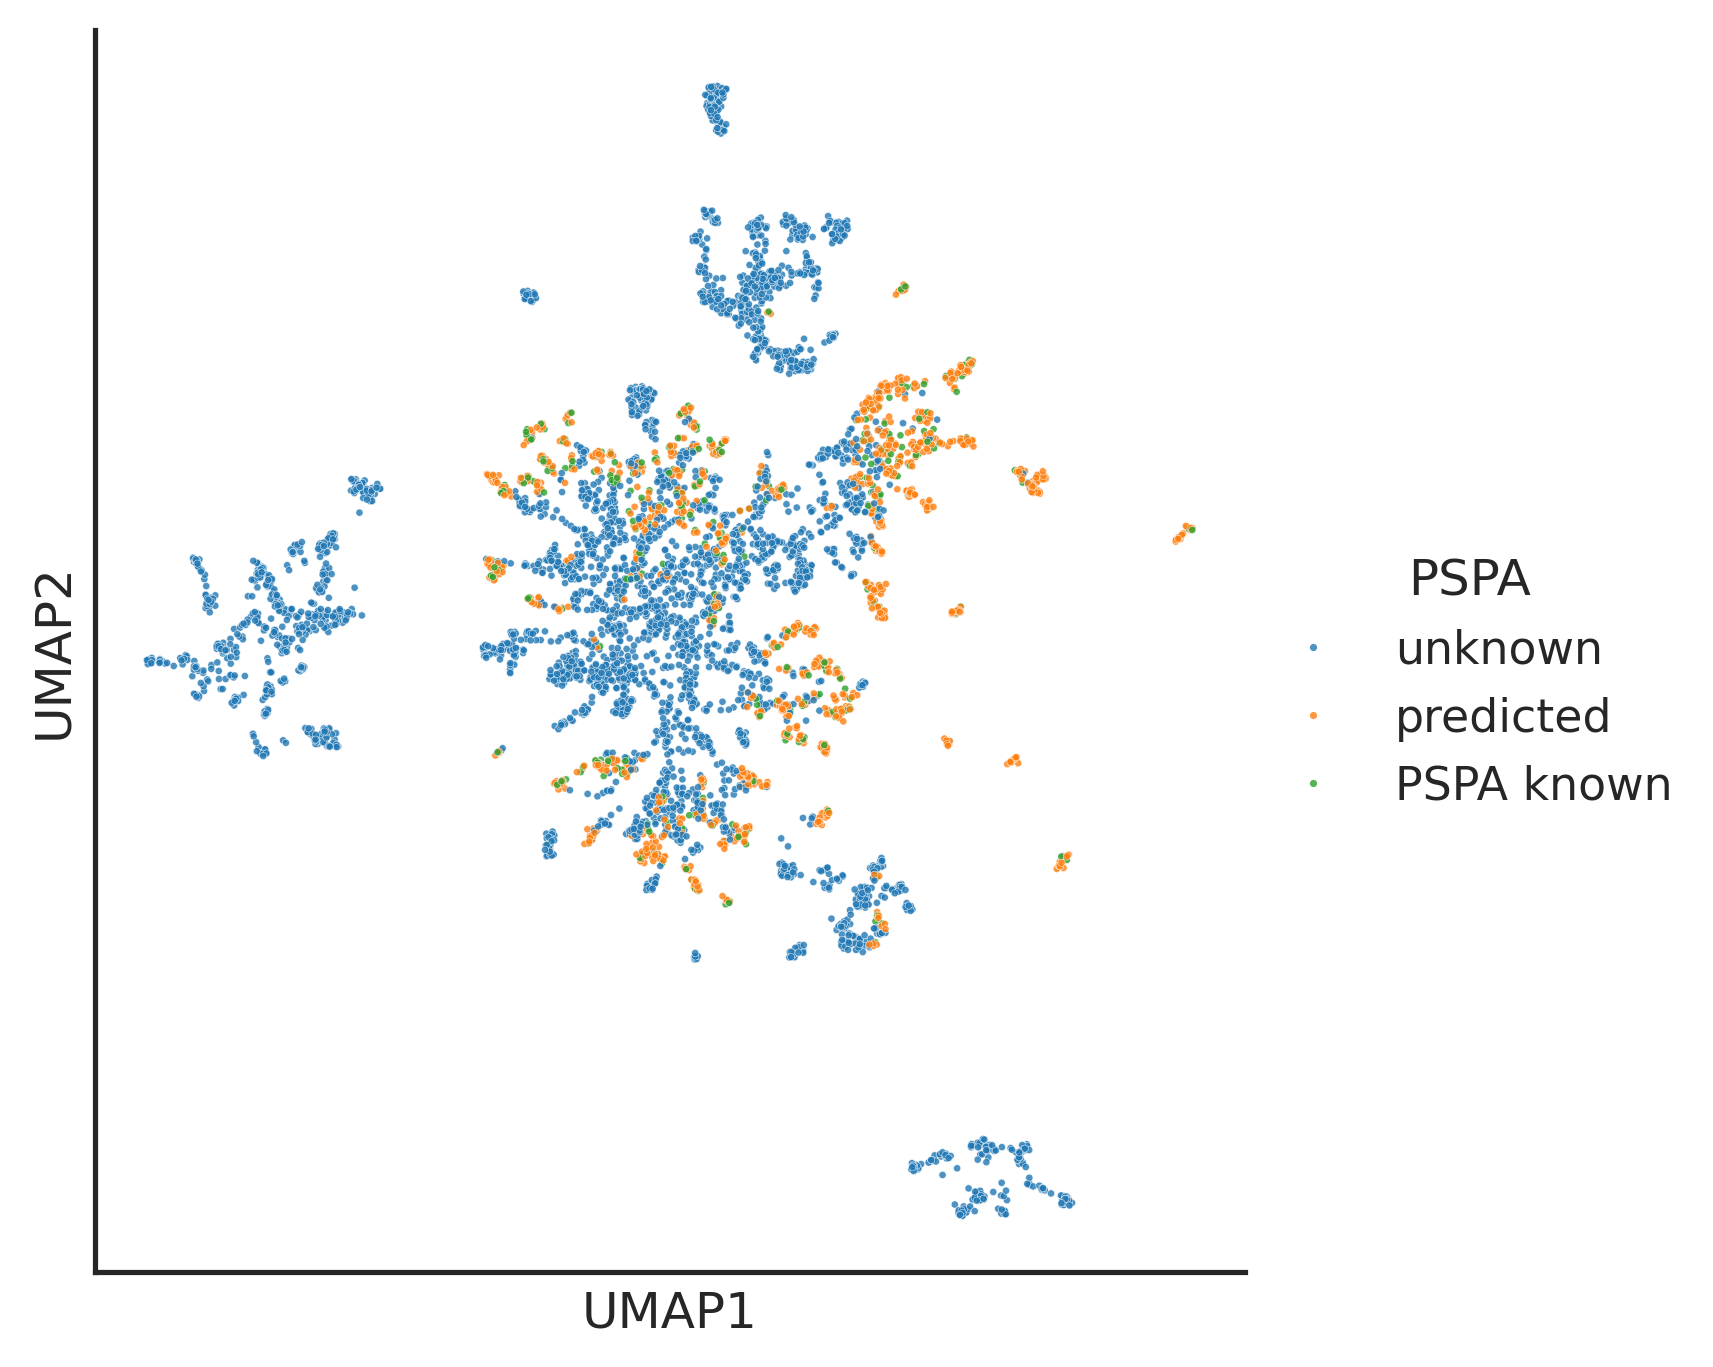

In [47]:
plot_cluster(t5,method='umap',complexity=30,s=3,hue=info.PSPA,legend=True,palette='tab10',min_dist=0.6)
save_svg('fig/umap_pspa_unknown.svg')

In [49]:
info.to_parquet('raw/pspa_unk.parquet')